In [1]:
from os import listdir
from time import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from tensorflow import math
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

from utils import auc, load_dataset, plot_roc, train

In [2]:
from tensorflow.config import list_physical_devices

assert len(list_physical_devices('GPU'))

In [3]:
def schedule(epoch, lr) -> float:
    if epoch >= 200 and epoch % 25 == 0:
        lr = lr * math.exp(-0.1)
    return lr

In [6]:
scheduler = LearningRateScheduler(schedule)
es = EarlyStopping(monitor='loss', patience=15, verbose=1)
optimizer = Adam(lr=1e-3)

epochs = 1500
validation_freq = 5
boundaries = [100, 300, 500, 1000, 2500, 5000]

-------------- Starting model_0 on noise 0 --------------
Epoch 00053: early stopping


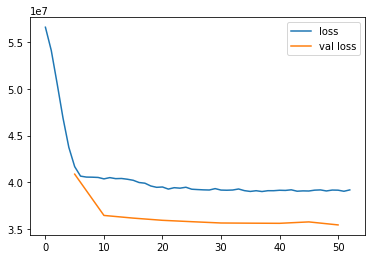

Training time: 9.94 minutes


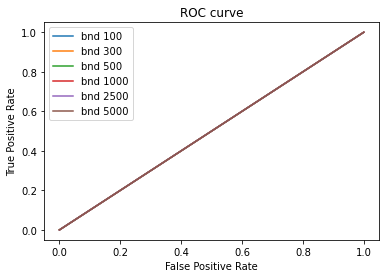

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50010
Boundary: 5000	AUC: 0.50000
-------------- Starting model_0 on noise 1 --------------
Epoch 00167: early stopping


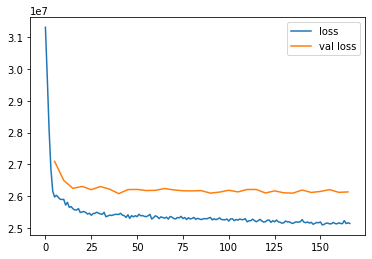

Training time: 31.27 minutes


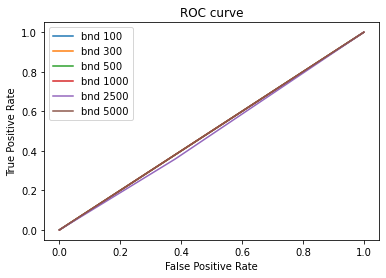

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50008
Boundary: 2500	AUC: 0.48916
Boundary: 5000	AUC: 0.50000
-------------- Starting model_0 on noise 2 --------------
Epoch 00056: early stopping


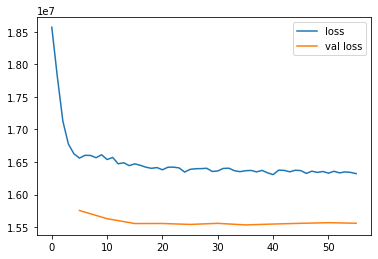

Training time: 10.56 minutes


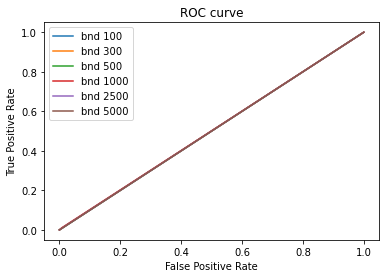

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50146
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_0 on noise 3 --------------
Epoch 00082: early stopping


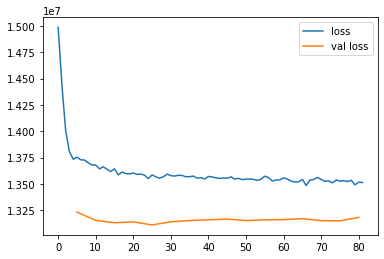

Training time: 15.41 minutes


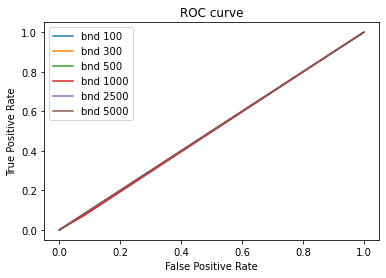

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50006
Boundary: 1000	AUC: 0.49580
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_0 on noise 5 --------------
Epoch 00043: early stopping


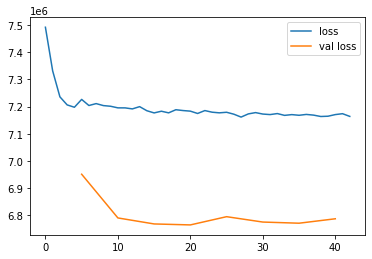

Training time: 8.10 minutes


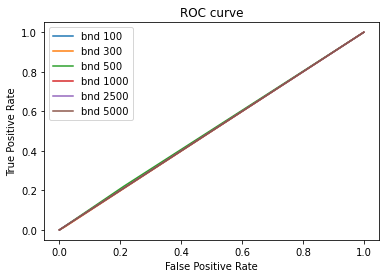

Boundary: 100	AUC: 0.50007
Boundary: 300	AUC: 0.49870
Boundary: 500	AUC: 0.50464
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_0 on noise 8 --------------
Epoch 00062: early stopping


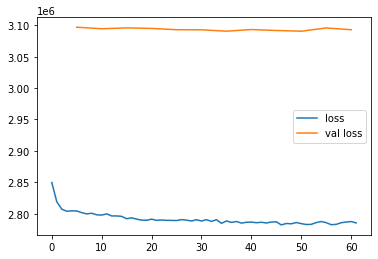

Training time: 11.63 minutes


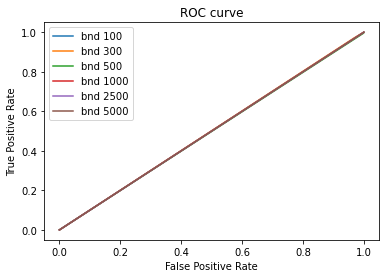

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50144
Boundary: 500	AUC: 0.49809
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_6 on noise 0 --------------
Epoch 00347: early stopping


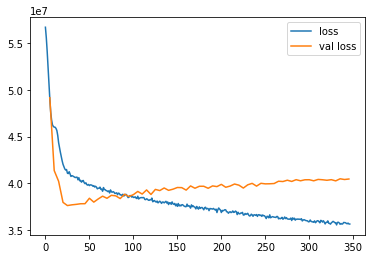

Training time: 29.22 minutes


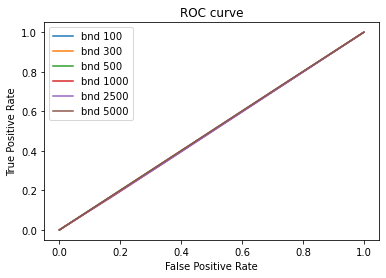

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.49766
Boundary: 2500	AUC: 0.49741
Boundary: 5000	AUC: 0.50119
-------------- Starting model_6 on noise 1 --------------
Epoch 00132: early stopping


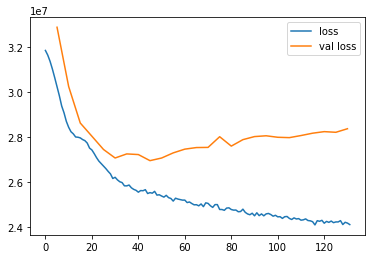

Training time: 11.17 minutes


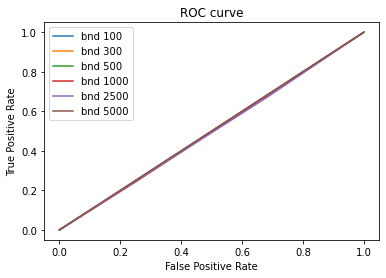

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.49857
Boundary: 500	AUC: 0.49971
Boundary: 1000	AUC: 0.49638
Boundary: 2500	AUC: 0.49435
Boundary: 5000	AUC: 0.50000
-------------- Starting model_6 on noise 2 --------------
Epoch 00374: early stopping


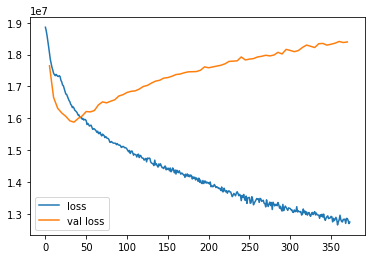

Training time: 32.20 minutes


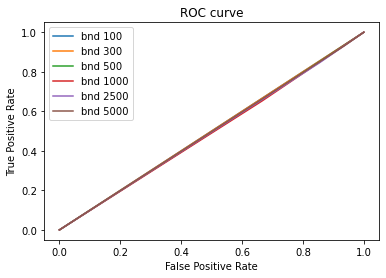

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.49601
Boundary: 1000	AUC: 0.49332
Boundary: 2500	AUC: 0.49558
Boundary: 5000	AUC: 0.49768
-------------- Starting model_6 on noise 3 --------------
Epoch 00352: early stopping


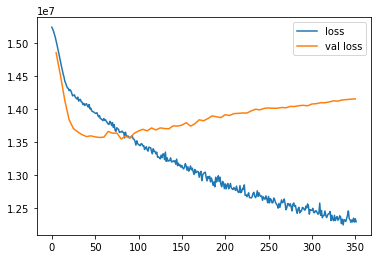

Training time: 29.81 minutes


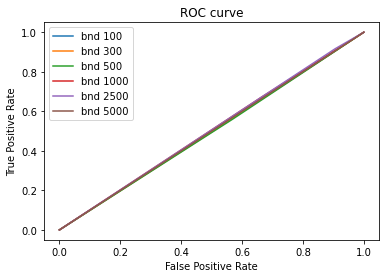

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.49752
Boundary: 500	AUC: 0.49561
Boundary: 1000	AUC: 0.50381
Boundary: 2500	AUC: 0.50529
Boundary: 5000	AUC: 0.50000
-------------- Starting model_6 on noise 5 --------------
Epoch 00333: early stopping


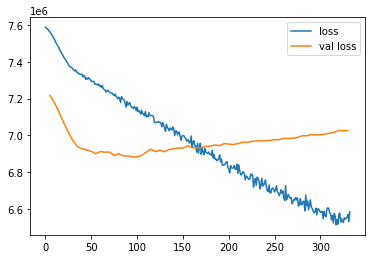

Training time: 28.34 minutes


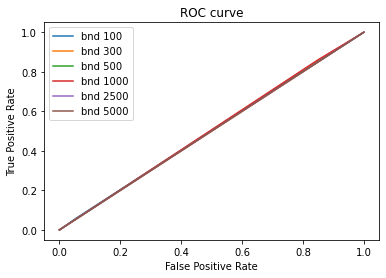

Boundary: 100	AUC: 0.50206
Boundary: 300	AUC: 0.49955
Boundary: 500	AUC: 0.50239
Boundary: 1000	AUC: 0.50539
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_6 on noise 8 --------------
Epoch 00370: early stopping


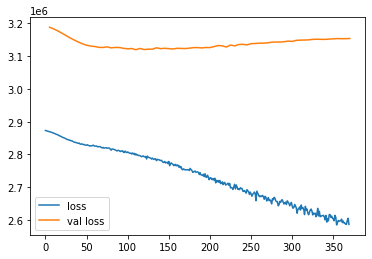

Training time: 31.54 minutes


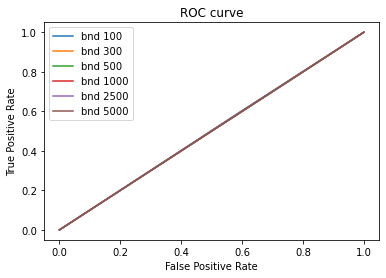

Boundary: 100	AUC: 0.50169
Boundary: 300	AUC: 0.49988
Boundary: 500	AUC: 0.49920
Boundary: 1000	AUC: 0.49979
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_2 on noise 0 --------------
Epoch 00312: early stopping


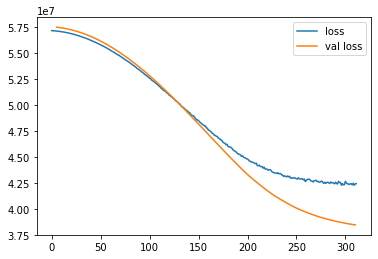

Training time: 17.92 minutes


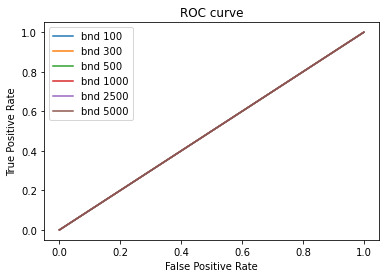

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_2 on noise 1 --------------
Epoch 00415: early stopping


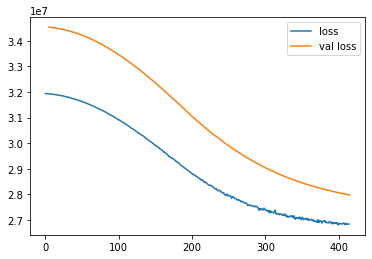

Training time: 23.87 minutes


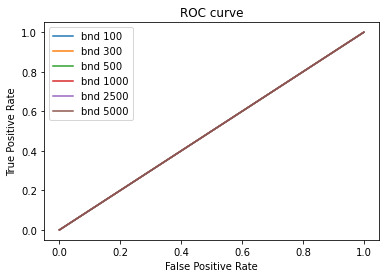

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_2 on noise 2 --------------
Epoch 00721: early stopping


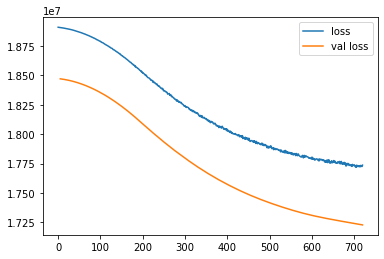

Training time: 41.34 minutes


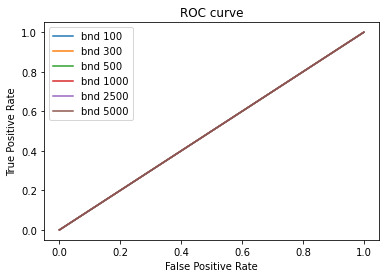

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_2 on noise 3 --------------
Epoch 00635: early stopping


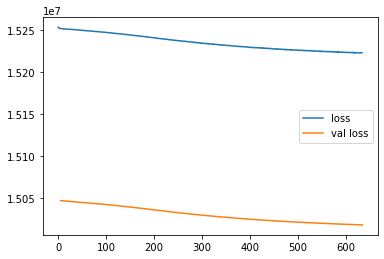

Training time: 36.12 minutes


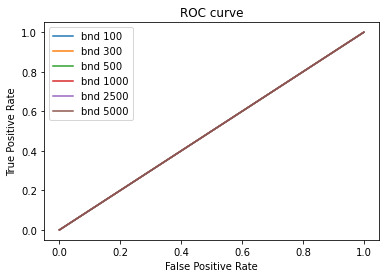

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_2 on noise 5 --------------
Epoch 00447: early stopping


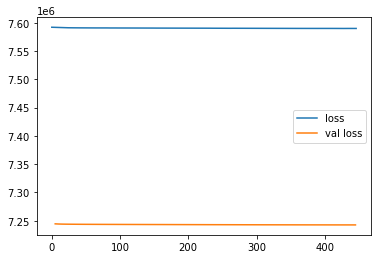

Training time: 25.63 minutes


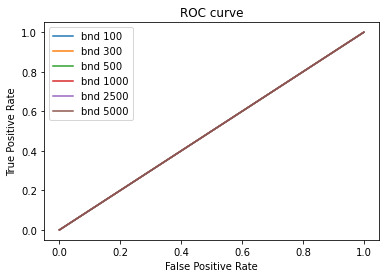

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_2 on noise 8 --------------
Epoch 00162: early stopping


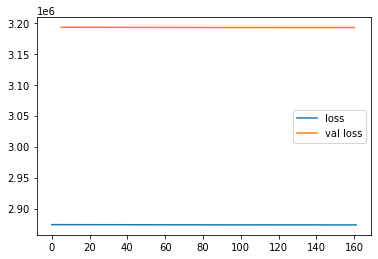

Training time: 9.30 minutes


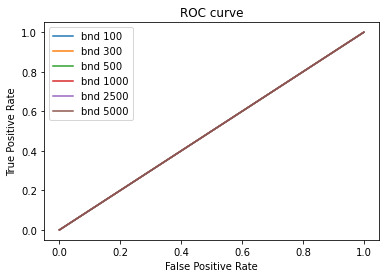

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_5 on noise 0 --------------
Epoch 00329: early stopping


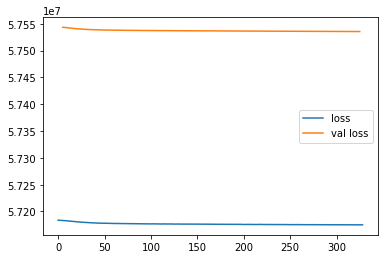

Training time: 28.89 minutes


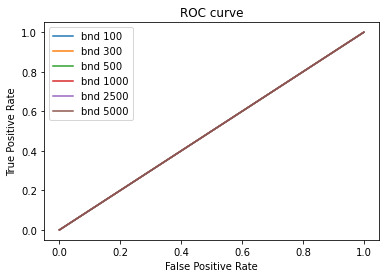

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_5 on noise 1 --------------
Epoch 00210: early stopping


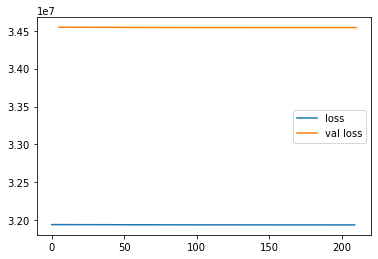

Training time: 18.46 minutes


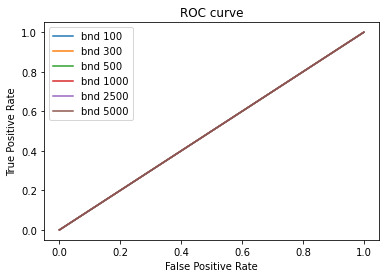

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_5 on noise 2 --------------
Epoch 00193: early stopping


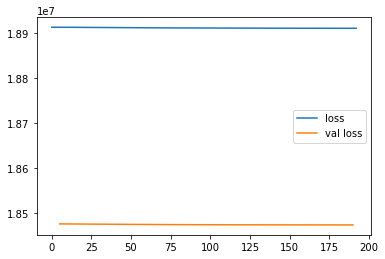

Training time: 17.15 minutes


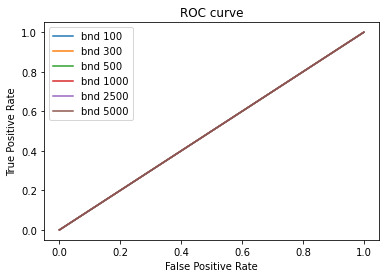

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_5 on noise 3 --------------
Epoch 00248: early stopping


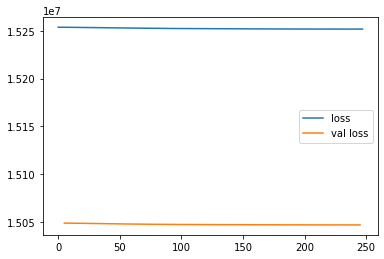

Training time: 21.96 minutes


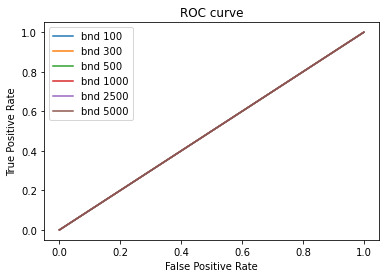

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_5 on noise 5 --------------
Epoch 00259: early stopping


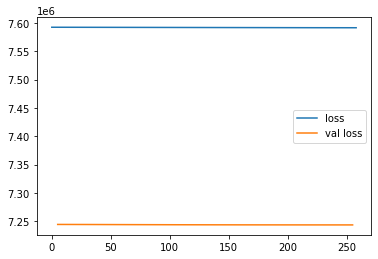

Training time: 22.89 minutes


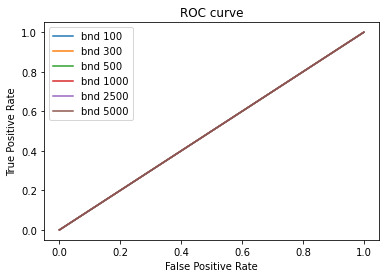

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_5 on noise 8 --------------
Epoch 00287: early stopping


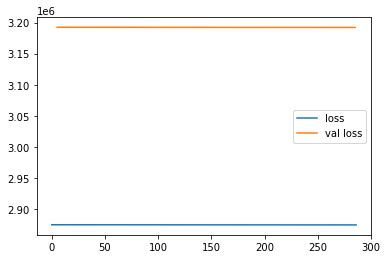

Training time: 25.58 minutes


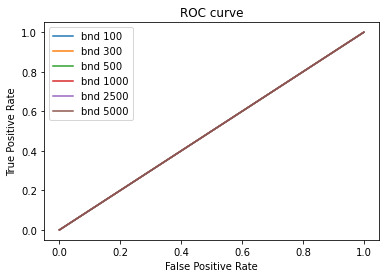

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_3 on noise 0 --------------
Epoch 00149: early stopping


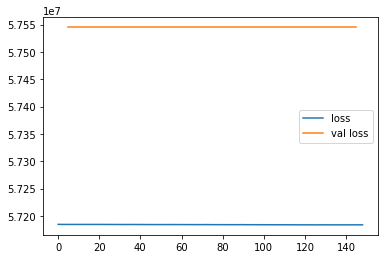

Training time: 8.42 minutes


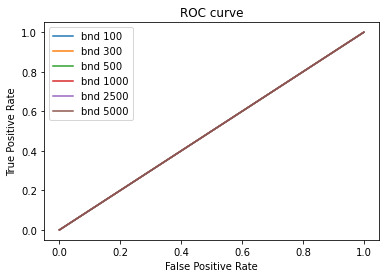

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_3 on noise 1 --------------
Epoch 00222: early stopping


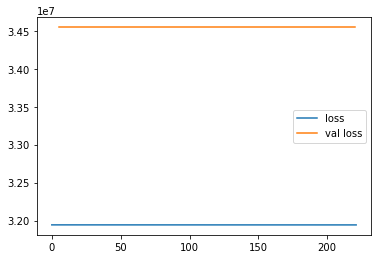

Training time: 12.54 minutes


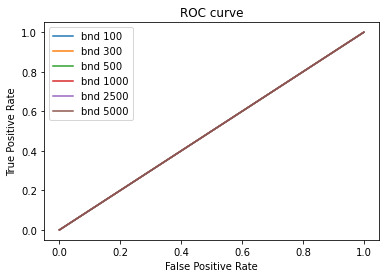

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_3 on noise 2 --------------
Epoch 00016: early stopping


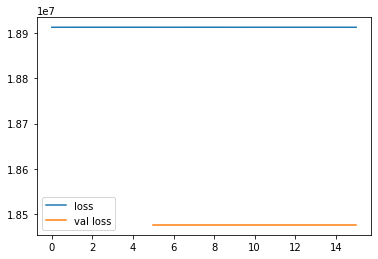

Training time: 0.92 minutes


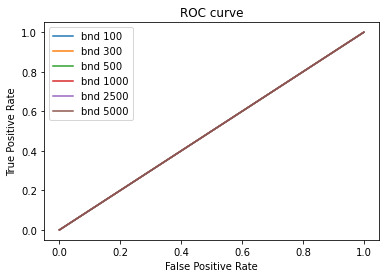

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_3 on noise 3 --------------
Epoch 00023: early stopping


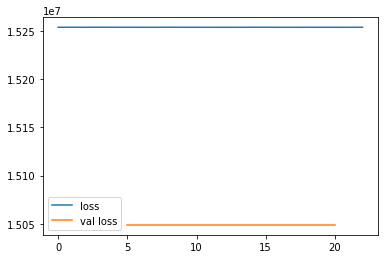

Training time: 1.32 minutes


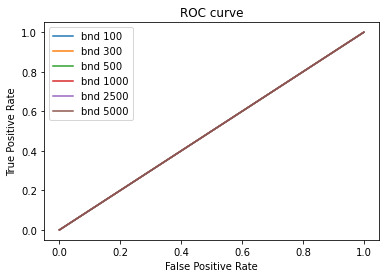

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_3 on noise 5 --------------
Epoch 00041: early stopping


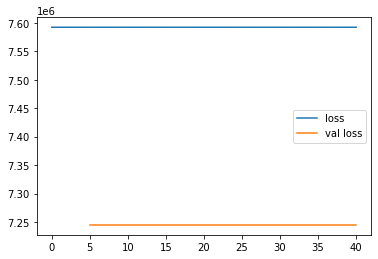

Training time: 2.33 minutes


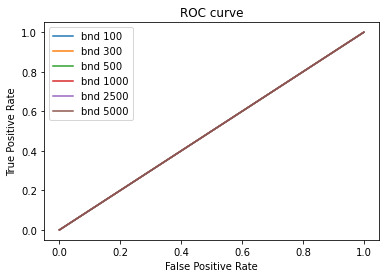

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_3 on noise 8 --------------
Epoch 00042: early stopping


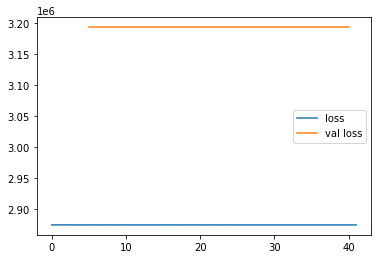

Training time: 2.39 minutes


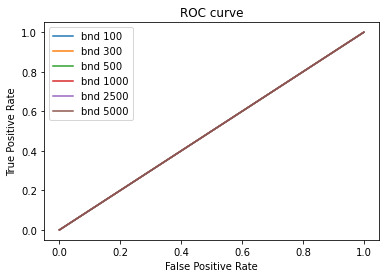

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_1 on noise 0 --------------
Epoch 00262: early stopping


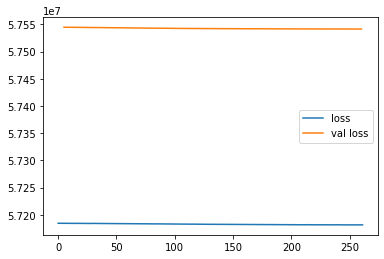

Training time: 15.22 minutes


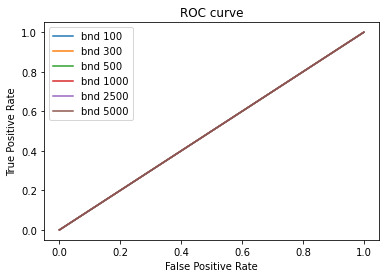

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_1 on noise 1 --------------
Epoch 00300: early stopping


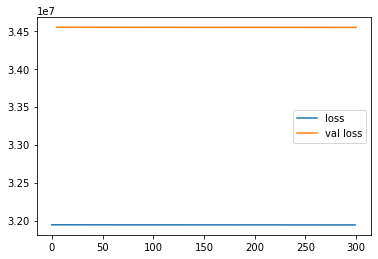

Training time: 17.37 minutes


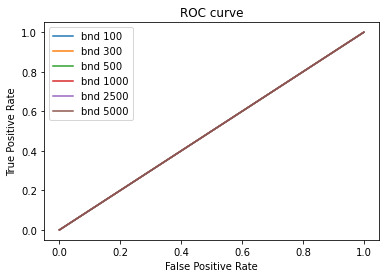

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_1 on noise 2 --------------
Epoch 00089: early stopping


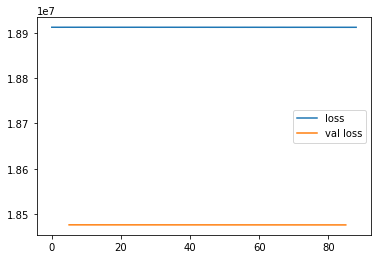

Training time: 5.15 minutes


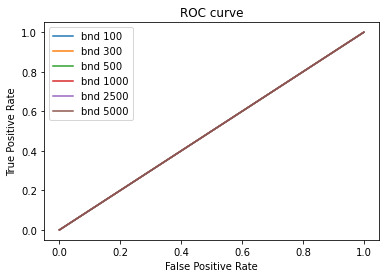

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_1 on noise 3 --------------
Epoch 00034: early stopping


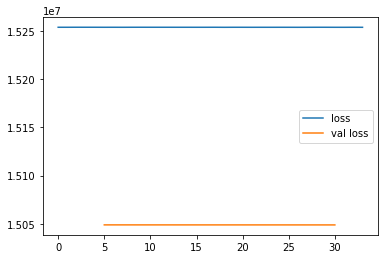

Training time: 1.99 minutes


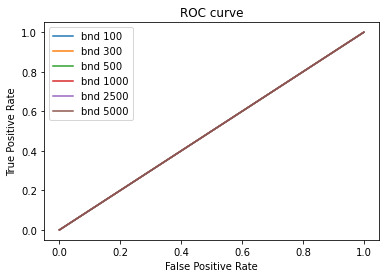

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_1 on noise 5 --------------
Epoch 00036: early stopping


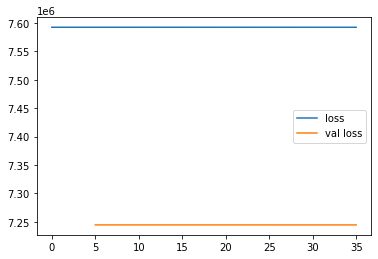

Training time: 2.10 minutes


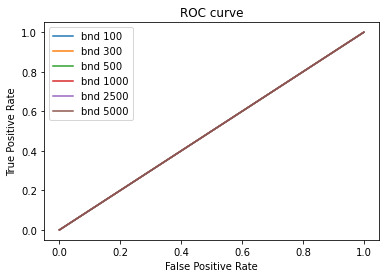

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_1 on noise 8 --------------
Epoch 00019: early stopping


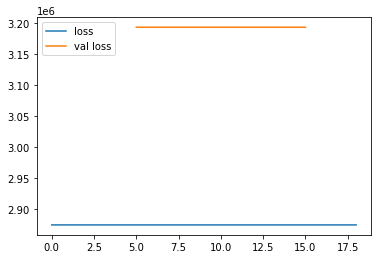

Training time: 1.11 minutes


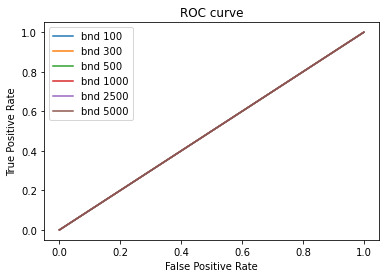

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_4 on noise 0 --------------
Epoch 00305: early stopping


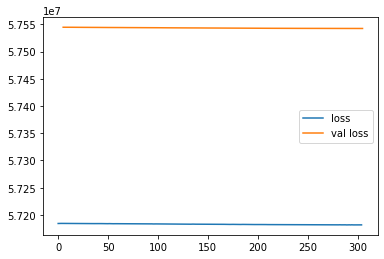

Training time: 27.26 minutes


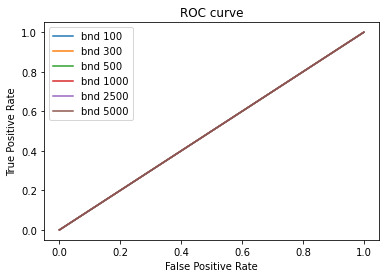

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_4 on noise 1 --------------
Epoch 00092: early stopping


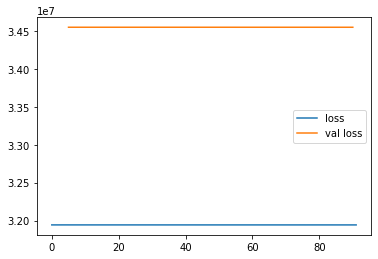

Training time: 8.16 minutes


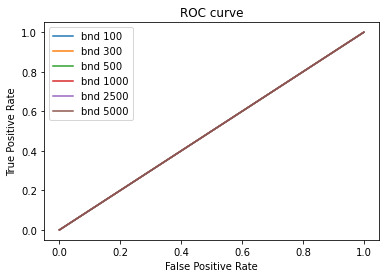

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_4 on noise 2 --------------
Epoch 00022: early stopping


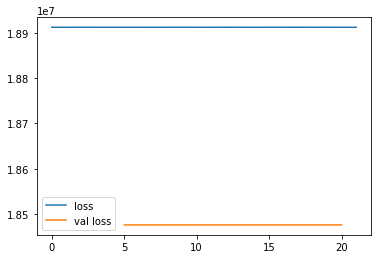

Training time: 1.99 minutes


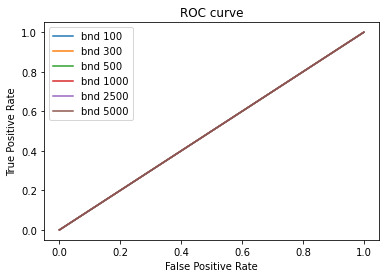

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_4 on noise 3 --------------
Epoch 00046: early stopping


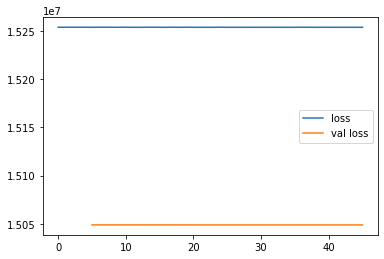

Training time: 4.11 minutes


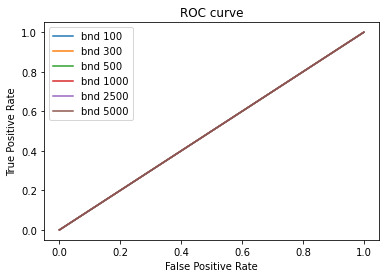

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_4 on noise 5 --------------
Epoch 00031: early stopping


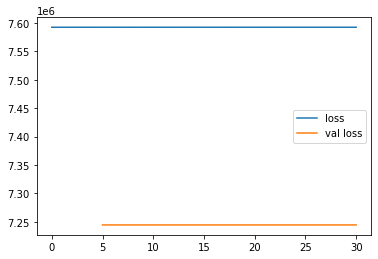

Training time: 2.80 minutes


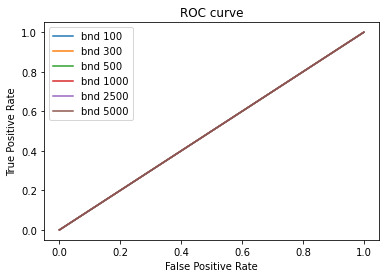

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
-------------- Starting model_4 on noise 8 --------------
Epoch 00022: early stopping


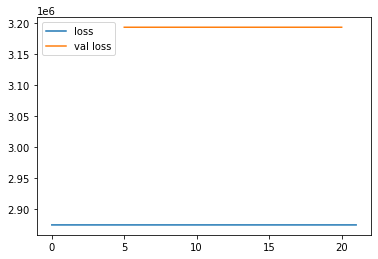

Training time: 1.99 minutes


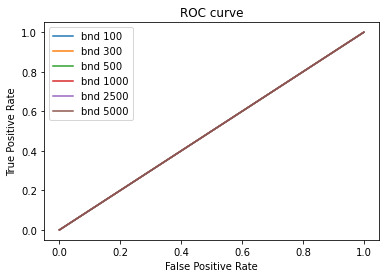

Boundary: 100	AUC: 0.50000
Boundary: 300	AUC: 0.50000
Boundary: 500	AUC: 0.50000
Boundary: 1000	AUC: 0.50000
Boundary: 2500	AUC: 0.50000
Boundary: 5000	AUC: 0.50000
CPU times: user 16h 4min 25s, sys: 1h 44min 58s, total: 17h 49min 23s
Wall time: 10h 58min 33s


In [7]:
%%time
for fname in listdir('../model_saves/eval_models'):
    for n in [0, 1, 2, 3, 5, 8]:
        print(f'-------------- Starting {fname.replace(".h5", "")} on noise {n} --------------')
        lstm = load_model(f'../model_saves/eval_models/{fname}', compile=False)
        X_train, y_train, X_test, y_test = load_dataset(f'm{n}')

        model = train(dataset=(X_train, y_train, X_test, y_test),
                      model=lstm,
                      epochs=epochs,
                      verbose=0,
                      validation_freq=validation_freq,
                      optimizer=optimizer,
                      callbacks=[scheduler, es])

        plot_roc(y_test, model.predict(X_test), boundaries)
        for boundary in boundaries:
            print(f'Boundary: {boundary}\tAUC: {auc(y_test, model.predict(X_test), boundary):.5f}')

        model.save(f'../model_saves/evals/{fname.replace(".h5", "")}-{n}.h5')